# Heart Disease prediction for the DSN AI Bootcamp 2024

**About the Hackathon**

The challenge at hand revolves around the creation of a sophisticated predictive model aimed at determining the likelihood of an individual having heart disease. As one of the leading causes of global mortality, detecting heart disease in its early stages is pivotal for enhancing patient outcomes and halting its progression. The conventional diagnostic methods often come with substantial costs and time requirements. Thus, there exists a pressing need for a cutting-edge predictive model that can evaluate the risk of heart disease utilizing easily accessible patient information.

**The Objective**

The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions. The model should demonstrate high accuracy and generalizability, ensuring its effectiveness on new, unseen data.

**Dataset Description**

**age**:        Age of the patient\
**sex**:        Patient's gender (0 = female, 1 = male)\
**cp**:         Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic\
**tretbps**:    Resting blood pressure (in mm Hg)\
**chol**:       Serum Cholestoral in mg/dl\
**fbs**:        fasting blood sugar > 120 mg/dl, (1 = True, 0 = False)\
**restecg**:     Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy\
**thalach**:     Maximum heart rate achieved\
**exang**:       Excercise induced angina(1 = yes, 0 = no)\
**oldpeak**:     ST depression induced by exercise related to rest(0= Upsloping, 1= Flat, 2= Downsloping)\
**slope**:       the Slope of the peak exercise ST segment\
**ca**:          Number of major vessels (0-4) colored by fluoroscopy\
**thal**:        Thalium Stress Test result, (0= Normal
1= Fixed defect
2= Reversible defect
3= Not described)\
**target**:      Heart disease status (0 = no disease, 1 = presence of disease)

# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data into the data frame.

In [3]:
#load theain and test dataset
train_df =pd.read_csv('Train_Dataset.csv')
test_df = pd.read_csv('Test_Dataset.csv')
sample_sub = pd.read_csv("Sample_Submission.csv")


let start by viewing the first few rows of each dataset to understand their structure.

In [4]:
# the top 5 rows of the  train dataset
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
# the top 5 rows of the  test dataset
test_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [6]:
# we need to rename id, age and sex columns as character case differ from the train data
test_df.rename(columns={'id':'Id','age':'Age','sex':'Sex'},inplace=True)
test_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [7]:
#let view the botton 5 rows of the dataset
train_df.tail()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
7302,15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


In [282]:
# show the number of rows and columns of the dataset
train_df.shape

(7303, 14)

In [9]:
test_df.shape

(2697, 14)

In [10]:
#Checking the types of dataset
train_df.dtypes

Id            int64
Age           int64
Sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [12]:
# check for missing values
train_df.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
test_df.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [14]:
# Checking for duplicate values
train_df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)

In [15]:
# Drop Id as it is not important to trin model
train_df=train_df.drop(['Id'], axis=1)
test=test_df.drop(['Id'], axis=1)

In [16]:
#Checking for statistical distribution of the dataset, such mean, median, min, max and standard deviation
train_df.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
cate_col=[]
cont_col=[]

for column in train_df.columns:
    if train_df[column].nunique()<=10:
        cate_col.append(column)

    else:
        cont_col.append(column)


**Univariate Analysis**

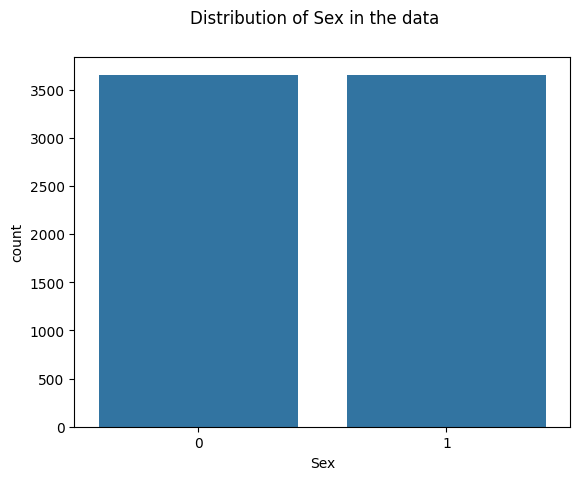

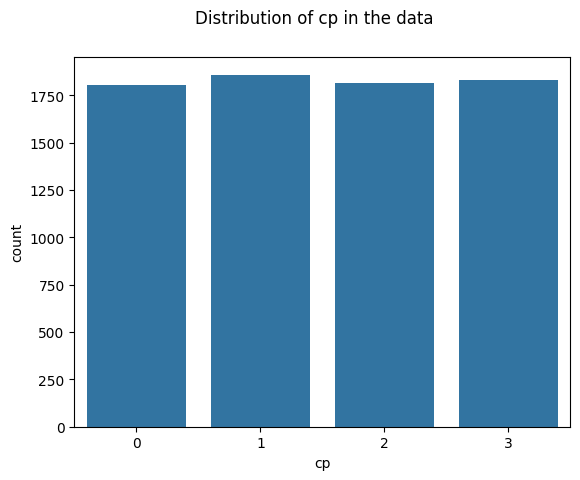

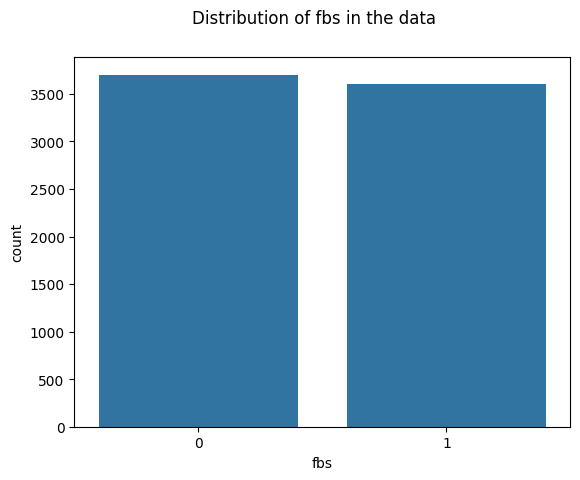

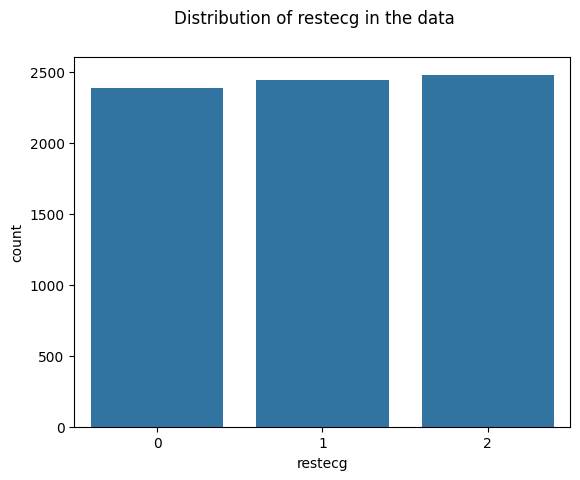

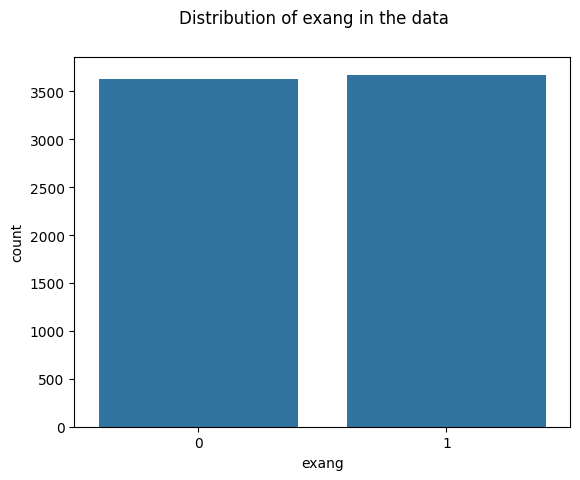

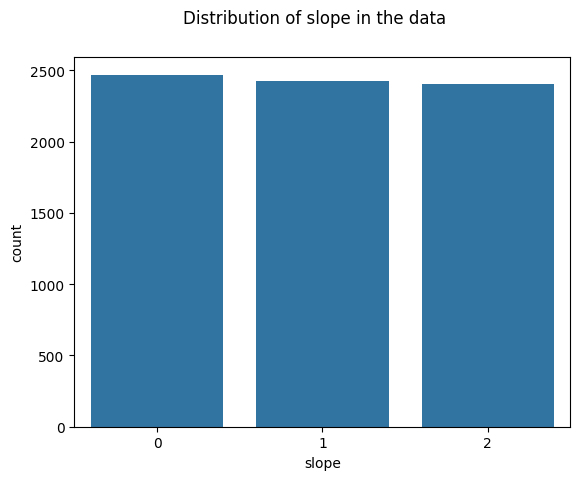

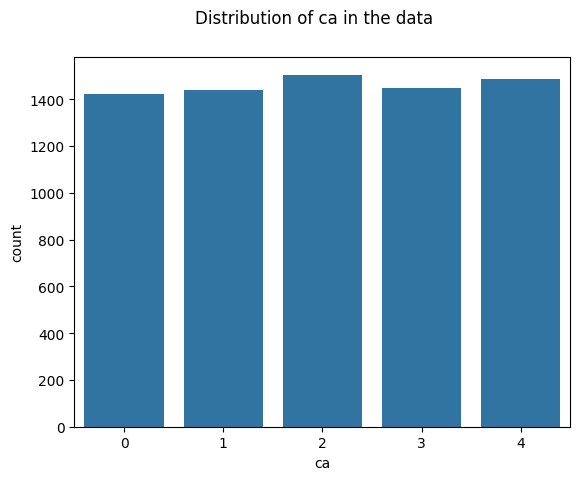

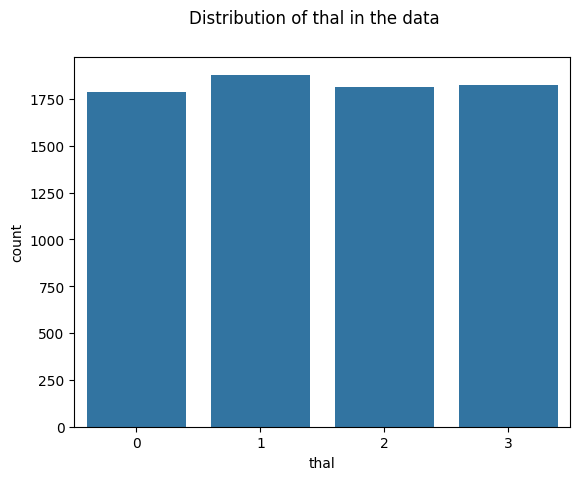

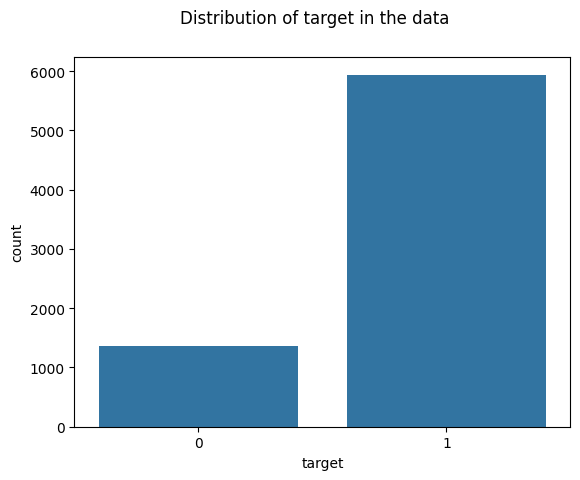

In [18]:
#let check the distribution of the categorical variables
for i in cate_col:
    sns.countplot(data=train_df,x=i)
    plt.suptitle(f'Distribution of {i} in the data')
    plt.show()

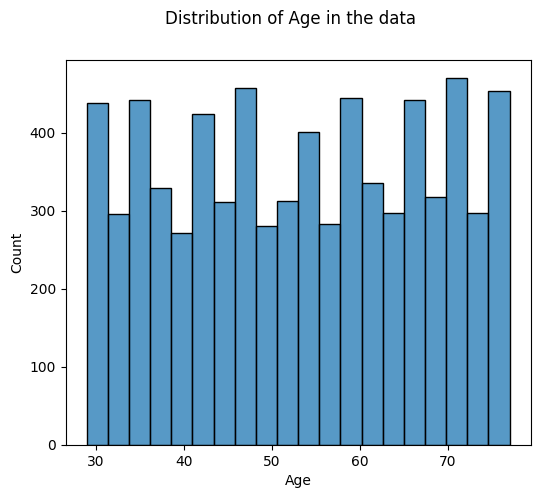

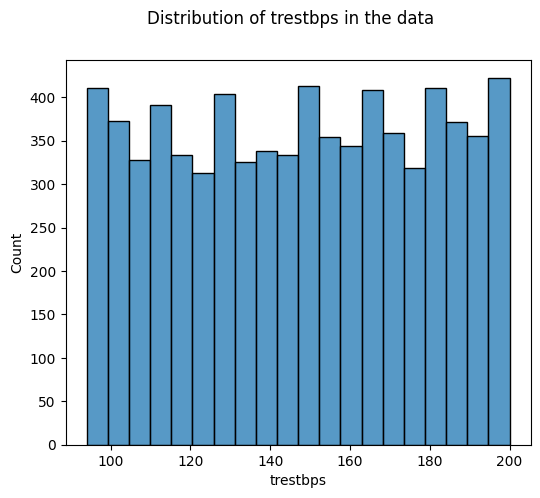

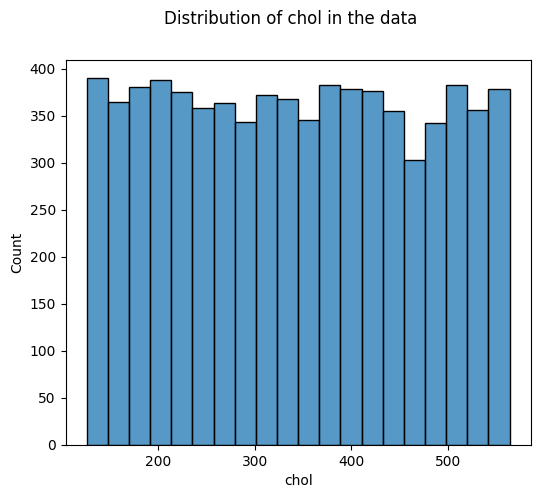

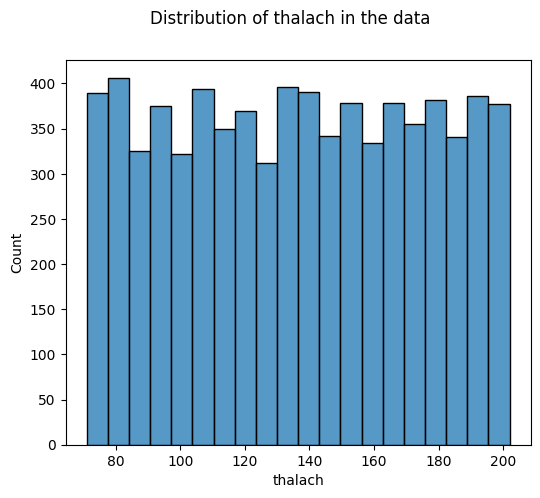

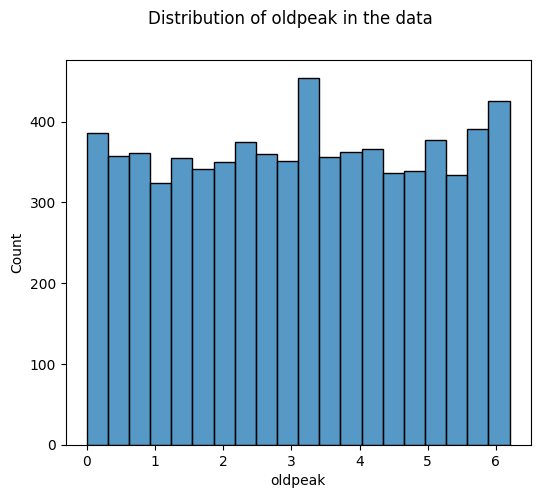

In [19]:
#let check the distribution of the continuos variables
for i in cont_col:
    plt.figure(figsize=(6, 5))
    sns.histplot(data=train_df,bins=20,x=i)
    plt.suptitle(f'Distribution of {i} in the data')
    plt.show()

Bivariate Analysis

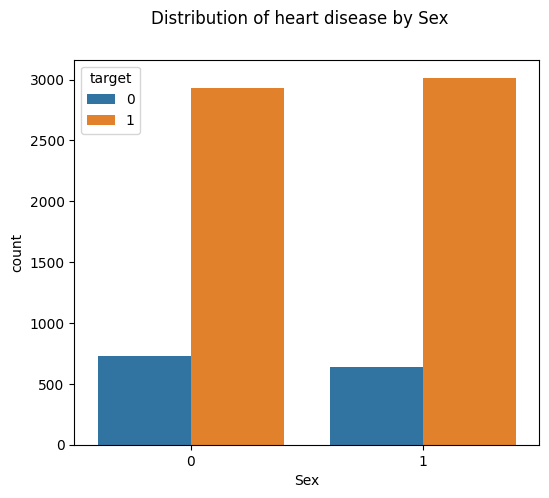

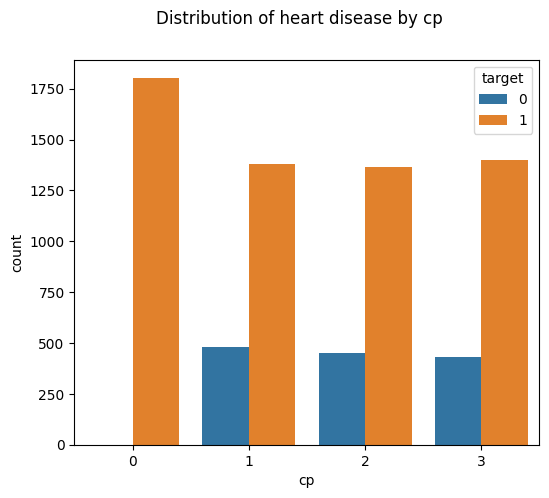

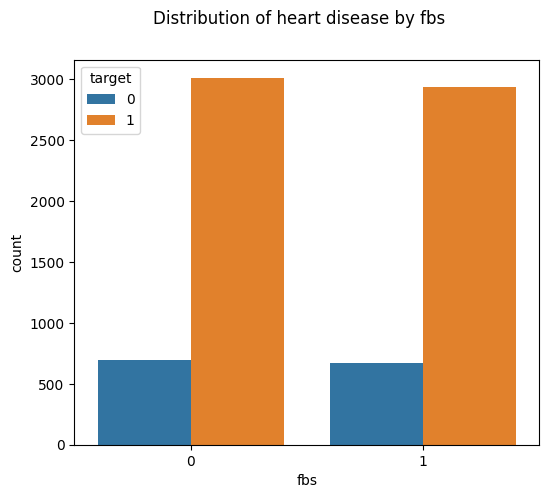

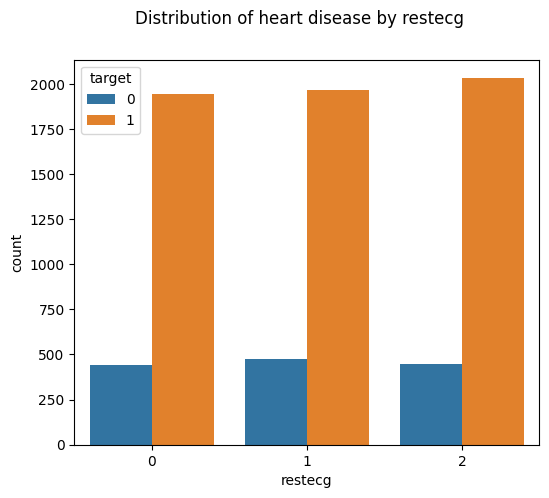

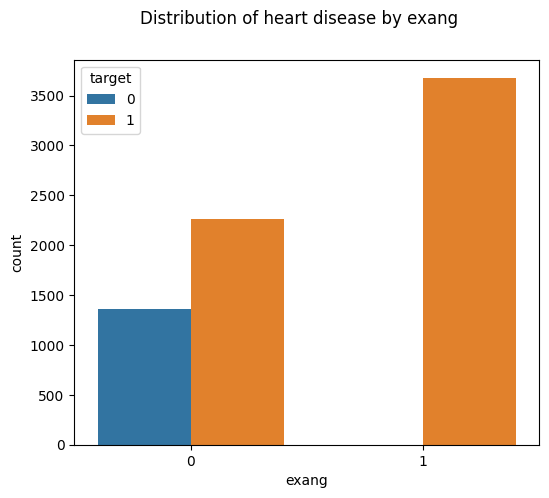

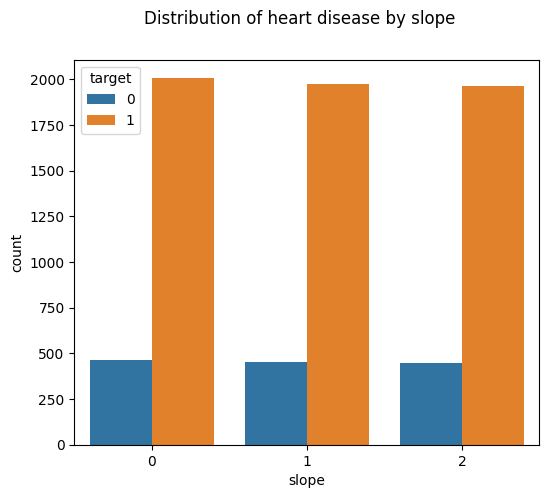

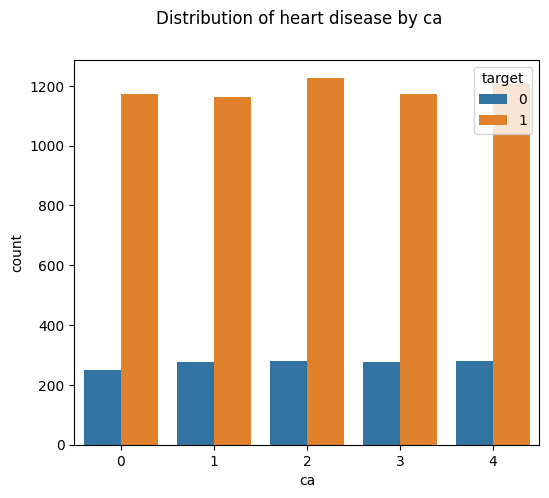

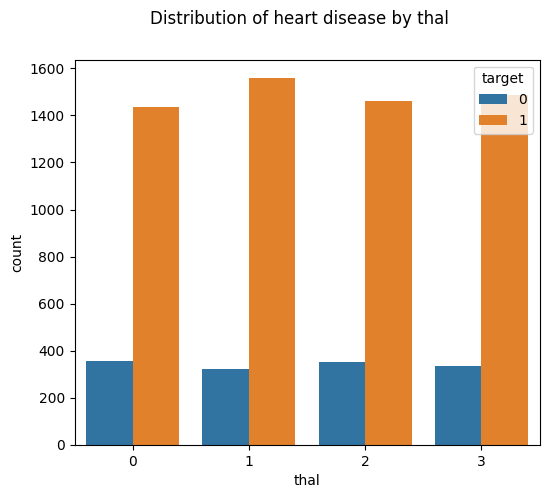

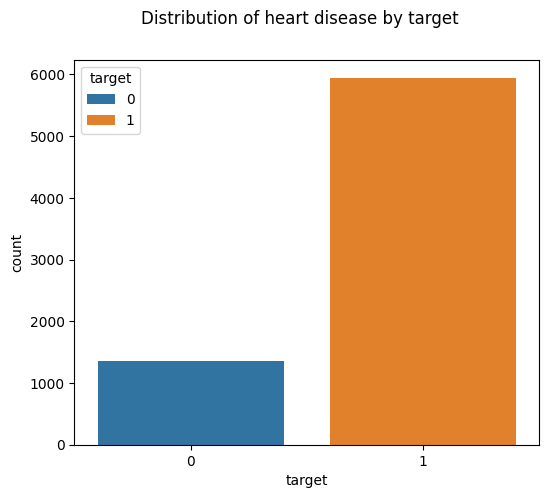

In [20]:
#let check the distribution of the categorical variables
for i in cate_col:
    plt.figure(figsize=(6, 5))
    sns.countplot(data=train_df,x=i, hue='target')
    plt.suptitle(f'Distribution of heart disease by {i}')
    plt.show()

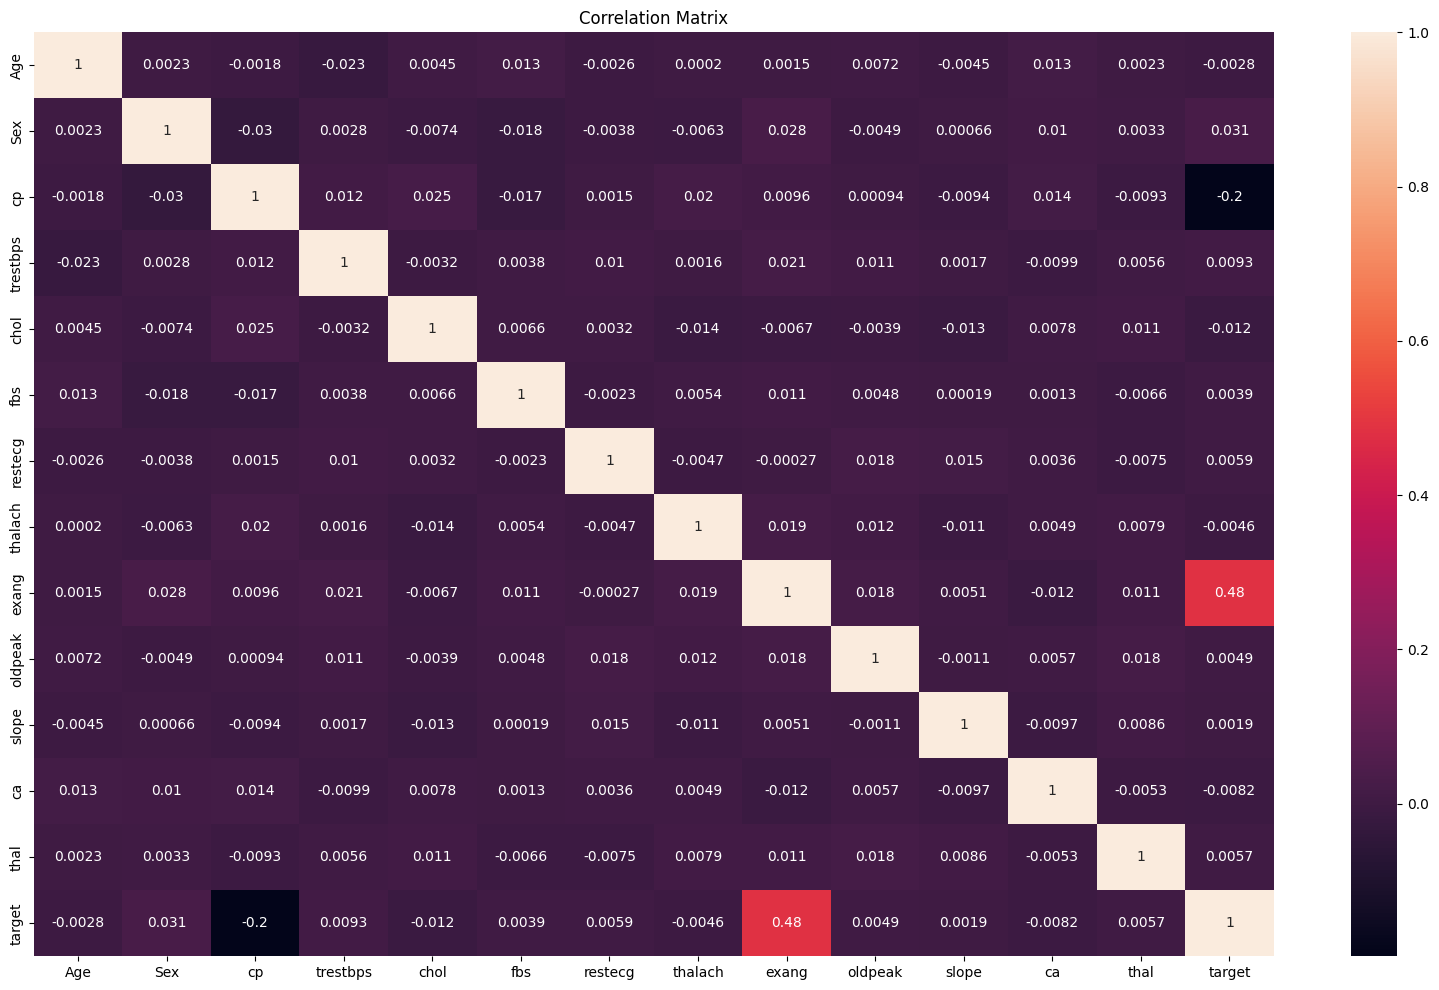

In [295]:
# let see the correlation among the variables
corr=train_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

# Data preprocessing

Spliting the Features and Target

In [22]:
# Dropping target variable from training data
target = train_df['target']
train = train_df.drop('target', axis=1)

feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler()
train[['Age','trestbps','thalach','oldpeak','chol']]=scaler.fit_transform(train[['Age','trestbps','thalach','oldpeak','chol']])
train.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.083333,0,1,0.603774,0.180365,1,0,0.633588,0,0.241935,1,4,1
1,0.500000,1,2,0.981132,0.063927,0,1,0.251908,0,0.129032,2,1,0
2,0.166667,1,2,0.066038,0.173516,1,0,0.641221,0,0.338710,1,3,1
3,0.958333,0,0,0.179245,0.410959,1,2,0.129771,1,0.790323,0,2,2
4,0.125000,1,2,0.424528,0.668950,1,1,0.725191,1,0.145161,2,4,0


In [24]:
test[['Age','trestbps','thalach','oldpeak','chol']]=scaler.fit_transform(test[['Age','trestbps','thalach','oldpeak','chol']])
test.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.854167,1,0,0.650943,0.842466,0,2,0.755725,1,0.322581,1,0,1
1,0.666667,1,0,0.349057,0.255708,0,2,0.022901,1,0.790323,2,2,2
2,0.500000,1,0,0.009434,0.986301,1,1,0.015267,1,0.112903,1,1,0
3,0.166667,0,1,0.792453,0.367580,0,1,0.923664,1,0.919355,1,0,0
4,0.125000,0,3,0.094340,0.353881,0,0,0.389313,0,0.209677,1,4,3


# Model Building

Model training

In [25]:
# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split

# Spliting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(train,target, stratify=target,train_size=0.2,random_state=42)

In [26]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#List of models
basedmodels=[
    LogisticRegression(),
    KNeighborsClassifier(7),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    SVC()
    ]
#Function initializing baseline machine learning model
def GetBasedModel():
    for model in basedmodels:
        model.fit(x_train,y_train)
        data_prediction=model.predict(x_test)
        accuracy=accuracy_score(y_test,data_prediction)
        print('Accuracyy score of the:',model, '=', accuracy)

In [277]:
GetBasedModel()

Accuracyy score of the: LogisticRegression() = 0.8160191682354955
Accuracyy score of the: KNeighborsClassifier(n_neighbors=7) = 0.8096868047236009
Accuracyy score of the: DecisionTreeClassifier() = 0.8122539791203149
Accuracyy score of the: GaussianNB() = 0.6885161731986993
Accuracyy score of the: RandomForestClassifier() = 0.8161903131952764
Accuracyy score of the: SVC() = 0.8105425295225056


Building Random Forest Model with parameter tunning

In [188]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params_grid=[{
    'n_estimators':[10,100,1000],
    'min_samples_split':[1,10,15],
    'min_samples_leaf':[5],
    'max_depth':[1,5,10]
}]

In [205]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(
    model,
    params_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=5, min_samples_leaf=5,
                                              min_samples_split=10,
                                              n_estimators=10),
             n_jobs=-1,
             param_grid=[{'max_depth': [1, 5, 10], 'min_samples_leaf': [5],
                          'min_samples_split': [1, 10, 15],
                          'n_estimators': [10, 100, 1000]}],
             scoring='accuracy')

In [206]:
grid_search.best_score_

np.float64(0.8184931506849316)

In [207]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 10}

In [208]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=10)

In [269]:
# training the Random Forest model with train dataset
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,n_estimators=10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=10)

building a predictive system

In [304]:
#let predict the test dataset
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 1])

# Model evaluation

In [301]:
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
# Predictions on train and test datasets
x_train_prediction = model.predict(x_train)
x_test_prediction = model.predict(x_test)

# Accuracy score on train and test dataset
train_data_accuracy=accuracy_score(x_train_prediction,y_train)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print('Accuracy score on train dataset:',train_data_accuracy)
print("Accuracy score on test dataset:", test_data_accuracy)


Accuracy score on train dataset: 0.9191780821917809
Accuracy score on test dataset: 0.8129385589594387


In [303]:
# Classification reports
print("Classification Report on Test Dataset:\n", classification_report(y_test, x_test_prediction))

# Confusion matrices
test_confusion_matrix = confusion_matrix(y_test, x_test_prediction)

print("Confusion Matrix on Test Dataset:\n", test_confusion_matrix)


Classification Report on Test Dataset:
               precision    recall  f1-score   support

           0       0.50      0.28      0.36      1090
           1       0.85      0.93      0.89      4753

    accuracy                           0.81      5843
   macro avg       0.67      0.61      0.63      5843
weighted avg       0.78      0.81      0.79      5843

Confusion Matrix on Test Dataset:
 [[ 310  780]
 [ 313 4440]]


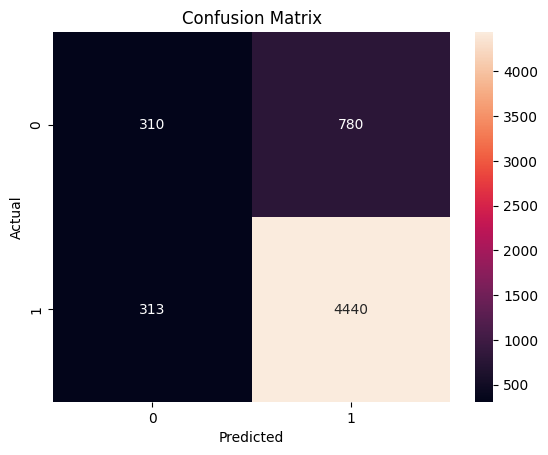

In [300]:
# Confusion matrix
cm = confusion_matrix(y_test, x_test_prediction)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance

Plotting feature importances to understand which features the model found most useful

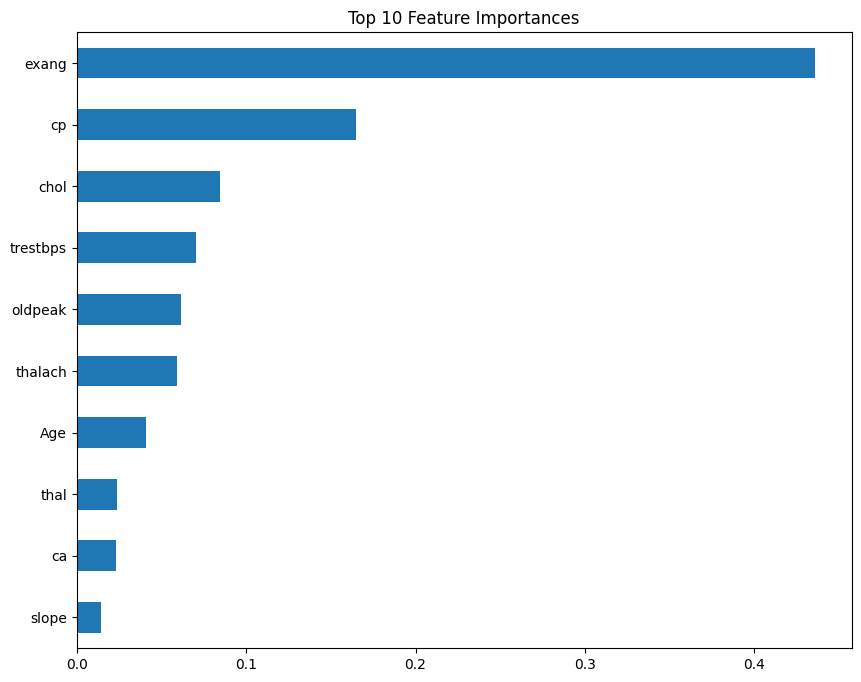

In [279]:
# Get the feature importances from the classifier
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.show()

In [273]:
# Get predictions from the Random Forest model
predictions = model.predict(test)

# Create a copy of the sample submission file
baseline_sub = sample_sub.copy()

# Add the predicted probabilities to the submission file
baseline_sub['target'] = predictions

# Save the submission file to a CSV
baseline_sub.to_csv('heart_dx_submittion25.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
